# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** TEMA ANGGARA
- **Email:** tema.anggara@gmail.com
- **ID Dicoding:** tema_anggara

## Menentukan Pertanyaan Bisnis

- Pada musim apa jumlah peminjaman sepeda mencapai angka tertinggi, bandingkan dengan musim lainnya?
- Pada jam berapa pengguna paling sering meminjam sepeda, dan apakah terdapat pola tertentu berdasarkan kategori pengguna?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("data/day.csv")
hour_df = pd.read_csv("data/hour.csv")

In [3]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset day.csv tidak memiliki atribut hr
- Dataset hour.csv memiliki memiliki hr

### Assessing Data

In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [7]:
# Cek missing values pada day_df
missing_day = day_df.isnull().sum()

# Cek missing values pada hour_df
missing_hour = hour_df.isnull().sum()

# Menampilkan jumlah missing values
print("Missing Values pada day_df:\n", missing_day[missing_day > 0])
print("\nMissing Values pada hour_df:\n", missing_hour[missing_hour > 0])

Missing Values pada day_df:
 Series([], dtype: int64)

Missing Values pada hour_df:
 Series([], dtype: int64)


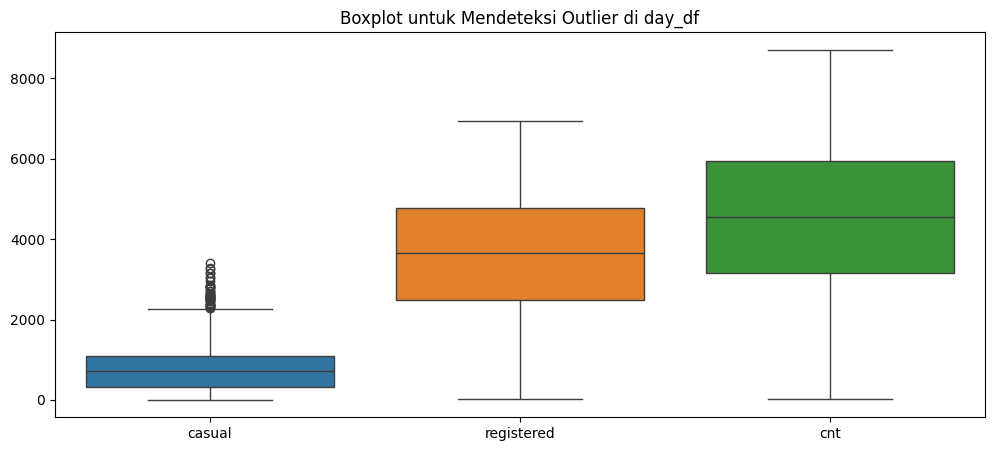

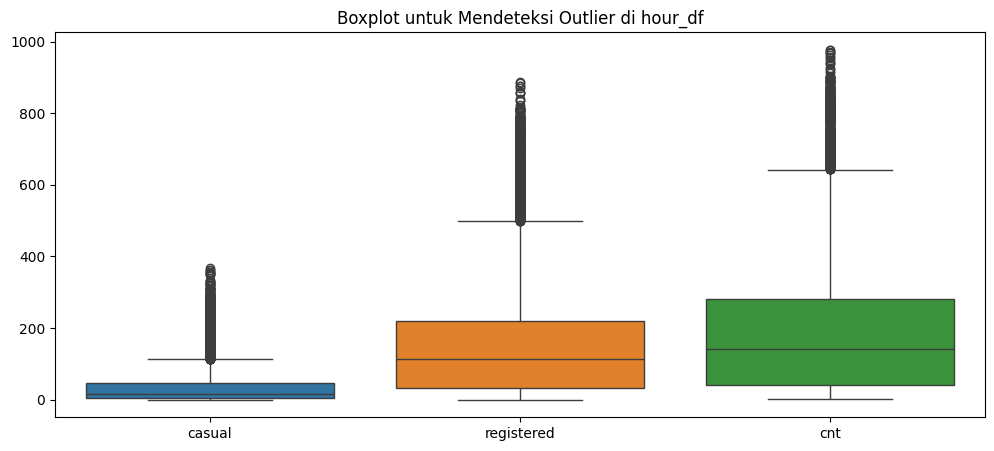

In [8]:
# Plot boxplot untuk melihat outlier pada day_df
plt.figure(figsize=(12, 5))
sns.boxplot(data=day_df[['casual', 'registered', 'cnt']])
plt.title("Boxplot untuk Mendeteksi Outlier di day_df")
plt.show()

# Plot boxplot untuk melihat outlier pada hour_df
plt.figure(figsize=(12, 5))
sns.boxplot(data=hour_df[['casual', 'registered', 'cnt']])
plt.title("Boxplot untuk Mendeteksi Outlier di hour_df")
plt.show()

**Insight:**
- Tidak Ada Missing Value pada kedua dataset
- Terdapat outlier pada kedua dataset

### Cleaning Data

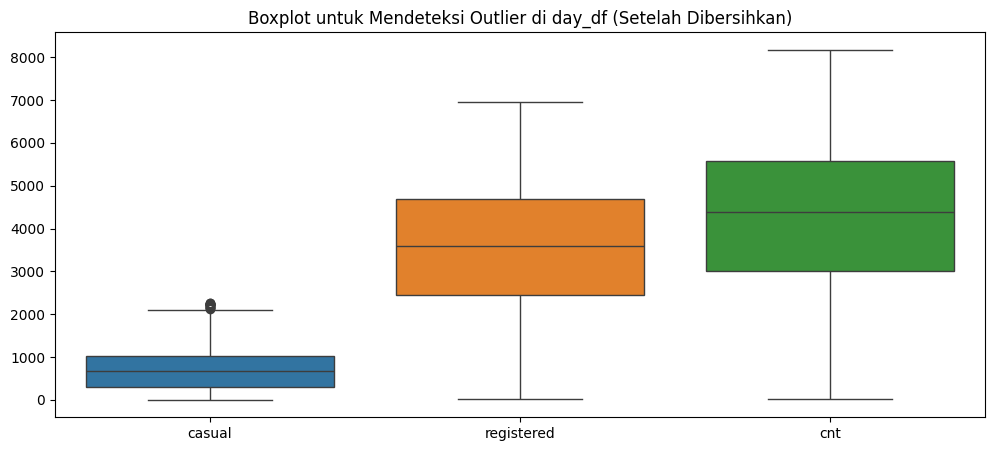

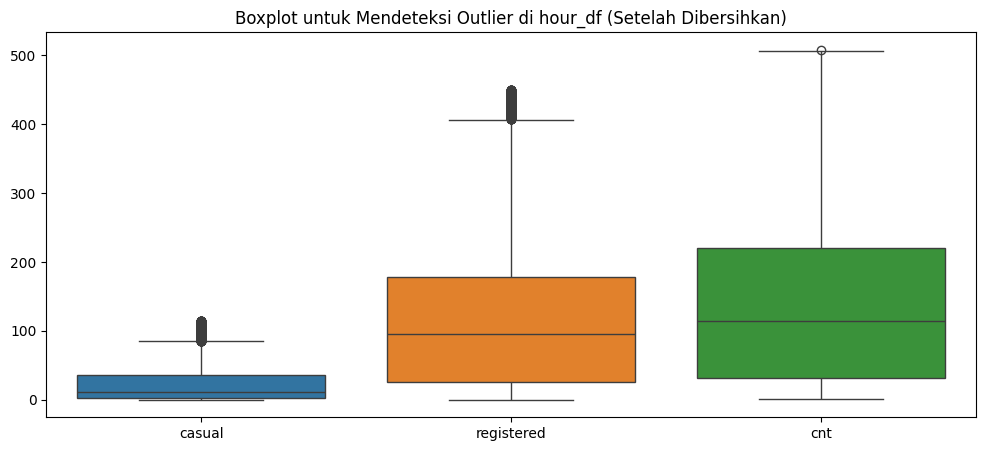

In [9]:
# Fungsi untuk menghapus outlier berdasarkan IQR
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df.loc[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Daftar kolom yang ingin dibersihkan dari outlier
columns_to_clean = ['casual', 'registered', 'cnt']

# Menghapus outlier pada day_df dan hour_df
day_df = remove_outliers(day_df, columns_to_clean)
hour_df = remove_outliers(hour_df, columns_to_clean)

# Plot boxplot untuk melihat outlier setelah dibersihkan pada day_df
plt.figure(figsize=(12, 5))
sns.boxplot(data=day_df[columns_to_clean])
plt.title("Boxplot untuk Mendeteksi Outlier di day_df (Setelah Dibersihkan)")
plt.show()

# Plot boxplot untuk melihat outlier setelah dibersihkan pada hour_df
plt.figure(figsize=(12, 5))
sns.boxplot(data=hour_df[columns_to_clean])
plt.title("Boxplot untuk Mendeteksi Outlier di hour_df (Setelah Dibersihkan)")
plt.show()

In [10]:
# # Simpan dataset yang sudah dibersihkan ke dalam file CSV
# day_df.to_csv('day_df.csv', index=False)
# hour_df.to_csv('hour_df.csv', index=False)

# print("Dataset yang sudah dibersihkan telah disimpan")

**Insight:**
- day_df yang sebelumnya banyak memiliki nilai outlier, sekarang sudah tidak ada
- hour_df yang sebelumnya banyak memiliki nilai outlier, sekarang sudah lebih baik

## Exploratory Data Analysis (EDA)

### Explore ...

In [11]:
day_df.groupby('season')[['casual', 'registered', 'cnt']].sum()

,casual,registered,cnt
season,,,
1,57467,406045,463512
2,149095,629151,778246
3,184757,766711,951468
4,111572,677309,788881


In [12]:
hourly_stats = hour_df.groupby('hr').agg({
    'casual': ['mean', 'max', 'min'],
    'registered': ['mean', 'max', 'min'],
    'cnt': ['mean', 'max', 'min']
})

# Menampilkan hasil
print(hourly_stats)

       casual           registered                  cnt         
         mean  max min        mean  max min        mean  max min
hr                                                              
0   10.158402   68   0   43.739669  234   0   53.898072  283   2
1    6.504144   49   0   26.871547  139   0   33.375691  168   1
2    4.772028   44   0   18.097902  104   0   22.869930  132   1
3    2.715925   26   0    9.011478   61   0   11.727403   79   1
4    1.253945   13   0    5.098996   22   0    6.352941   28   1
5    1.411437   16   0   18.478382   64   0   19.889819   66   1
6    4.161379   19   0   71.882759  203   0   76.044138  213   1
7   10.128593   35   0  172.118003  450   1  182.246596  474   1
8   18.934827   69   0  205.731161  449   4  224.665988  498   5
9   29.954167  110   0  188.515278  399   6  218.469444  426  14
10  36.186930  114   0  114.133739  322   8  150.320669  423   8
11  40.830918  113   0  127.095008  352   5  167.925926  462  10
12  42.644891  114   0  1

**Insight:**
- Dari 4 jenis musim, musim gugur memiliki jumlah peminjam terbanyak berdasarkan data day_df
- Kedua user mengalami peningkatan peminjaman sepeda mulai jam 7 pagi, lalu menurun di jam 22 malam berdasarkan data hour_df

## Visualization & Explanatory Analysis

### Pertanyaan 1:

<Figure size 1200x600 with 0 Axes>

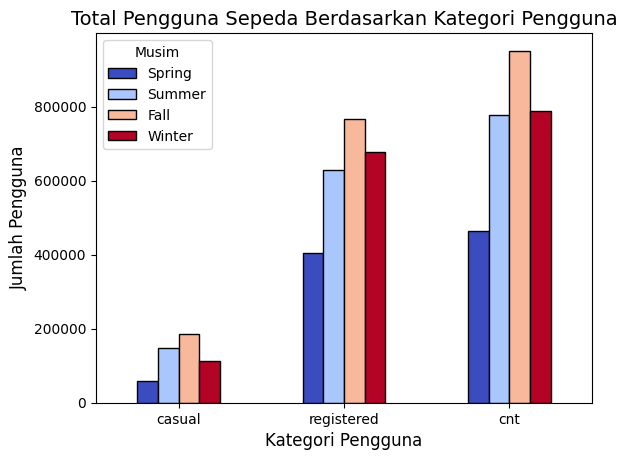

In [13]:
# Mengelompokkan data berdasarkan season dan menjumlahkan nilai dengan observed=False
seasonal_data = day_df.groupby('season', observed=False)[['casual', 'registered', 'cnt']].sum()

# Mapping angka season ke nama musim
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
seasonal_data.index = seasonal_data.index.map(season_mapping)  # Mengganti indeks dengan nama musim

# Transpose data agar sumbu x menjadi kategori pengguna
seasonal_data_T = seasonal_data.T  # Menukar baris dan kolom

# Membuat bar chart dengan sumbu x sebagai kategori pengguna
plt.figure(figsize=(12, 6))
seasonal_data_T.plot(kind='bar', colormap="coolwarm", edgecolor='black')

# Menambahkan judul dan label
plt.title("Total Pengguna Sepeda Berdasarkan Kategori Pengguna", fontsize=14)
plt.xlabel("Kategori Pengguna", fontsize=12)
plt.ylabel("Jumlah Pengguna", fontsize=12)
plt.xticks(rotation=0)  # Menampilkan kategori pengguna secara horizontal
plt.legend(title="Musim")

# Menampilkan plot
plt.show()

### Pertanyaan 2:

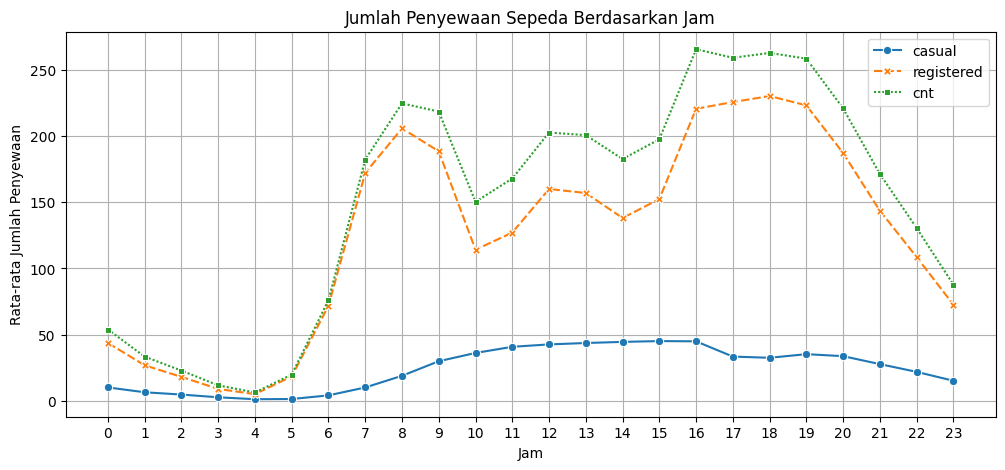

In [14]:
# Hitung jumlah penyewaan per jam
hourly_sum = hour_df.groupby('hr')[['casual', 'registered', 'cnt']].mean()

# Plot
plt.figure(figsize=(12, 5))
sns.lineplot(data=hourly_sum, markers=True)
plt.xticks(range(0, 24))
plt.title("Jumlah Penyewaan Sepeda Berdasarkan Jam")
plt.xlabel("Jam")
plt.ylabel("Rata-rata Jumlah Penyewaan")
plt.grid()
plt.show()

**Insight:**
- Musim gugur mencatat jumlah peminjaman sepeda tertinggi, dengan peningkatan 26% untuk pengguna casual dan 22% untuk pengguna terdaftar dibandingkan musim panas. Kemudian kembali menurun dimusim dingin.
- Pengguna terdaftar (registered) cenderung melakukan peminjaman pada pukul 08:00 dan 18:00, sedangkan pengguna casual tidak mengalami lonjakan signifikan pada jam tertentu dan lebih cenderung melakukan peminjaman secara merata sepanjang hari.

## Analisis Lanjutan (Opsional)

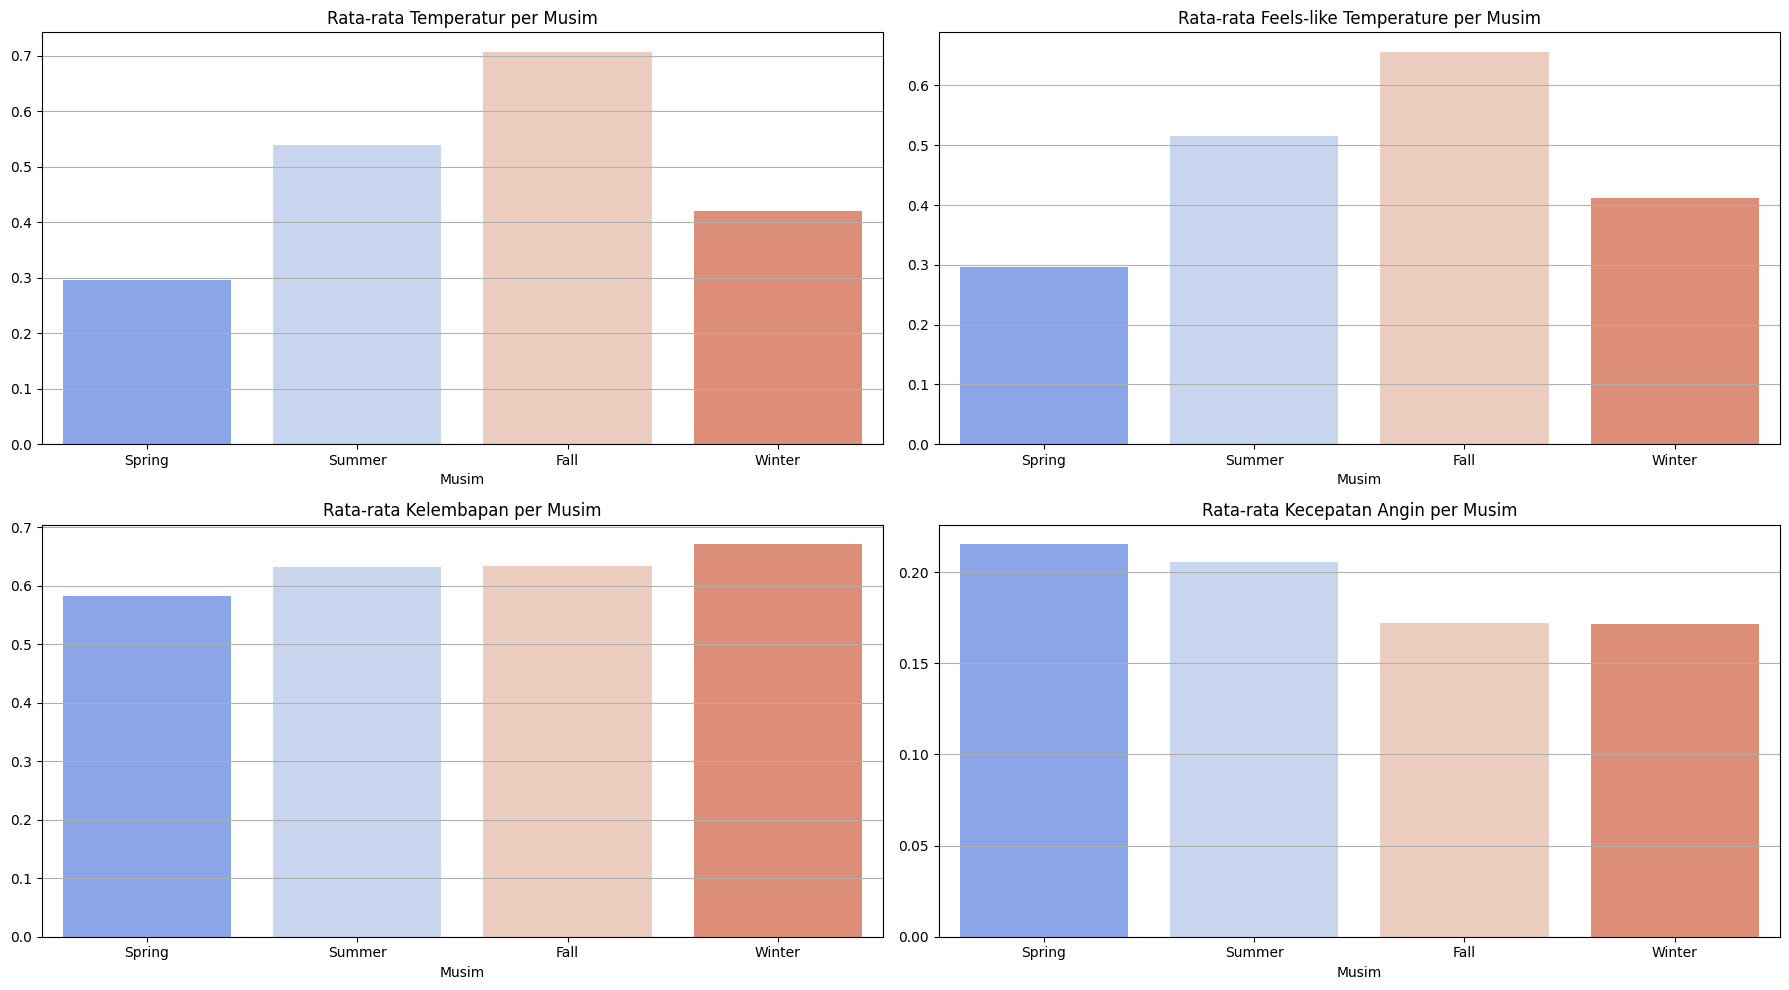

In [15]:
# Daftar metrik yang akan divisualisasikan
metrics = {
    "temp": "Rata-rata Temperatur per Musim",
    "atemp": "Rata-rata Feels-like Temperature per Musim",
    "hum": "Rata-rata Kelembapan per Musim",
    "windspeed": "Rata-rata Kecepatan Angin per Musim"
}

# Mapping angka season ke nama musim
season_mapping = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}

# Pastikan 'season' dalam format kategori
day_df["season"] = day_df["season"].astype("category")
day_df["season_label"] = day_df["season"].map(season_mapping)

# Menghitung rata-rata setiap metrik berdasarkan musim dengan observed=False
seasonal_avg = day_df.groupby("season_label", observed=False)[["temp", "atemp", "hum", "windspeed"]].mean().reset_index()

# Membuat subplots secara otomatis
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

# Loop untuk membuat setiap plot
for ax, (col, title) in zip(axes.flat, metrics.items()):
    sns.barplot(data=seasonal_avg, x="season_label", y=col, hue="season_label", palette="coolwarm", ax=ax, legend=False)
    ax.set_title(title)
    ax.set_xlabel("Musim")
    ax.set_ylabel("")  # Menghapus label sumbu Y
    ax.grid(axis="y")

plt.tight_layout()
plt.show()

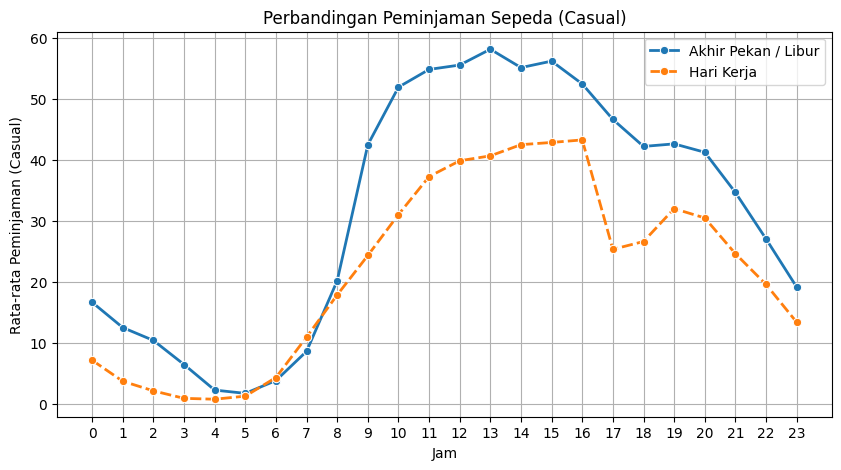

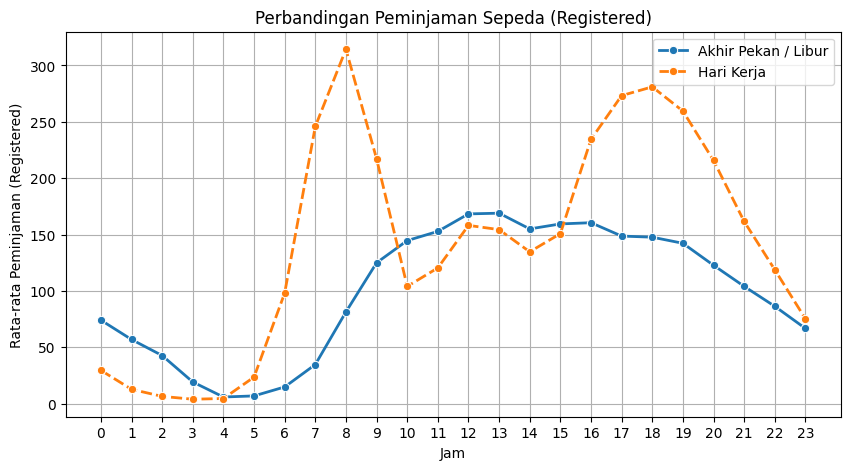

In [16]:
# Mapping workingday menjadi kategori hari
hour_df['day_type'] = hour_df['workingday'].map({0: 'Akhir Pekan / Libur', 1: 'Hari Kerja'})

# Daftar kategori pengguna untuk dianalisis
user_types = {
    "casual": "Perbandingan Peminjaman Sepeda (Casual)",
    "registered": "Perbandingan Peminjaman Sepeda (Registered)"
}

# Loop untuk membuat dua plot (Casual & Registered)
for user, title in user_types.items():
    plt.figure(figsize=(10, 5))
    
    # Simpan plot dalam variabel untuk menangkap legend otomatis
    lines = sns.lineplot(
        data=hour_df.groupby(["hr", "day_type"])[user].mean().unstack(), 
        linewidth=2, marker="o"
    )

    # Formatting plot
    plt.xticks(range(0, 24))
    plt.title(title)
    plt.xlabel("Jam")
    plt.ylabel(f"Rata-rata Peminjaman ({user.capitalize()})")

    # Ambil legend yang sesuai
    handles, labels = lines.get_legend_handles_labels()
    plt.legend(handles, labels)  # Gunakan legend otomatis agar warna sesuai

    plt.grid()
    plt.show()

## Conclusion

- Faktor cuaca kemungkinan memainkan peran penting, di mana suhu pada musim gugur lebih nyaman dibandingkan musim panas yang cenderung panas atau musim dingin yang terlalu dingin. Sehingga pada musim gugur, penyedia layanan dapat menyiapkan lebih banyak sepeda untuk mengantisipasi lonjakan permintaan.
- Peminjaman sepeda oleh pengguna terdaftar juga lebih tinggi pada hari kerja dibandingkan akhir pekan. Penyedia layanan dapat menyesuaikan ketersediaan sepeda di stasiun-stasiun utama pada pukul 08:00 dan 18:00, yang kemungkinan besar bertepatan dengan jam sibuk berangkat dan pulang kerja untuk menghindari kekurangan unit.